<h3 align="center">Programming for Data Analysis</h3> 

<h3 align="center">Project 1 - Analysis of Games Sales 1980 - 2017</h3> 

#### Author: Sean Elliott
#### Student Number: G00411288

<h3 align="center">Setting up Environment</h3> 

In [164]:
# Importing libraries for analysis

import pandas as pd

import numpy as np

import seaborn as sns 

import sklearn.neighbors as nei

import matplotlib.pyplot as plt 

import sklearn.model_selection as mod

import seaborn as sns

import sklearn.preprocessing 

# define location of dataset - had to create own folder on github with the required data as couldnt scrape from the website.

df = pd.read_csv('https://raw.githubusercontent.com/SeanE15/Programming-for-Data-Analysis/main/Assignment%201/Dataset/vgsales.csv')

![Console Pics](https://pm1.narvii.com/5915/56ae7f6bc169e4915d0b71776b70d207f678d9cc_hq.jpg)

## <h3 align="center">Project Question</h3>

For this project I will be analysing data from a Video Game Sales dataset. I will be using the dataset to compare video game sales across the different regions on the world, and comparing to see if popular game sales will swing sales in favour of one console or another, if the year a game/console was sold plays a role in the dataset, and analyse whether region also plays a significant role in the findings. 

****

## <h3 align="center">Introduction</h3>

*****
This dataset includes a few descriptions of note - Name of the Game, Genre of the Game, Publisher of the Game, Year of Production, Sales Region (broken down into North America, Europe, Japan, Other Regions and Global Sales; a combination of all sales regions) and also the Platform that the game is available on. This [dataset](https://www.kaggle.com/datasets/gregorut/videogamesales) and it's subsequent information have been scraped from [Github](https://github.com/GregorUT/vgchartzScrape.). 

<h3 align="center">Cleansing and Organising Data</h3>

I start by cleansing the data below; ensuring that the information I require for my analysis is easily found, concise and compact for comparison.

In [165]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


 For ease of access I will now clean the dataset - to remove unwanted data.

In [166]:
# ask the program to print the list of columns so that I can discern which data I want to analyse and which is extrenuous material.
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [167]:
# ask the program to remove any unnessecary columns which will not help my analysis.
df = df.drop(columns = ['Rank'])

In [168]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [169]:
# remove any nan values from the dataset to avoid issues later on at the prediction stage.
df = df.dropna()

In [170]:
# check that no more NaN values are in the data set.
print(df.isnull().sum())

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


<h3 align="center">Analysis of Data</h3> 

----

Now that I have cleaned and organised the data set and figured out what information is in the set - I will start to analyse it further. 
The first quesiton I will ask, based on the dataset, is which region had the most sales?
 
 ----

In [171]:
# I start by using the mean() function to find the average sales in the specific regions. The mean vaule must be multiplied
# by 1 million in order for the results to be shown in the millions.
# I then ask the program to print the results using an f'string and ask it to show me the answer correct to 3 decimal places. 

a = (df['EU_Sales'].mean()*1000000)
b = (df['JP_Sales'].mean()*1000000)
c = (df['NA_Sales'].mean()*1000000)
d = (df['Other_Sales'].mean()*1000000)
e = (df['Global_Sales'].mean()*1000000)

print('The average sales in Europe =', (F"${a:,.3f}"))
print('The average sales in Japan =', (F"${b:,.3f}"))
print('The average sales in North America =', (F"${c:,.3f}"))
print('The average sales in Other Regions =', (F"${d:,.3f}"))
print('The Global sales =', (F"${e:,.3f}"))

The average sales in Europe = $147,731.263
The average sales in Japan = $78,833.098
The average sales in North America = $265,646.676
The average sales in Other Regions = $48,426.125
The Global sales = $540,910.319


The findings above clearly show that North America is the most profitable market for selling video games based off the 
information from the dataset. I now want to show this in a more visually appealing way. I plot the above information in a pie chart.

----

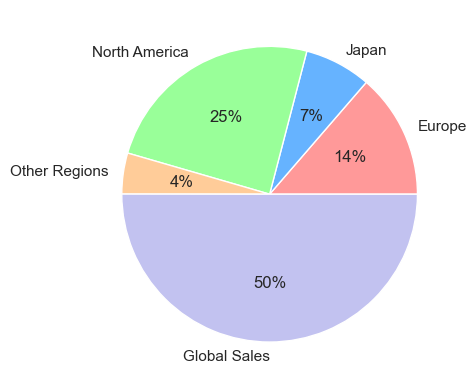

In [172]:
# I make a pie chart to show the results. I create two lists - the regions for sales and also the sales totals.

data = [147731.263, 78833.098, 265646.676, 48426.125, 540910.319]
labels = ['Europe', 'Japan', 'North America', 'Other Regions', 'Global Sales']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# the (autopct='%.0f%%') allows me to show the percentage values on the pie chart
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%')
plt.show()

As we can see from the piechart above, North America appears to be the most profitable single region for selling video games.
We will now analyse what the most popular console sold is, using the 'Global Sales' data.

In [173]:
#Group the Global Sales based on platform and then reset the index value
consoles = pd.DataFrame(df.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())

# Rename Platform column
consoles.rename(columns = {'Platform':'Consoles'}, inplace = True)

#Concatenating our variables.
platsales=pd.concat([consoles],axis=1)
platsales.head(6)

,Consoles,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39


I will now show the above console information in a donut plot which will highlight which is the most popular games console of the top 10 from the dataset above. We see from the donut chart below the Playstation 2('PS2') sold the most units globally with the Xbox 360, Playstation 3('PS3') and Nintendo Wii coming in tied  for sales in 2nd place.

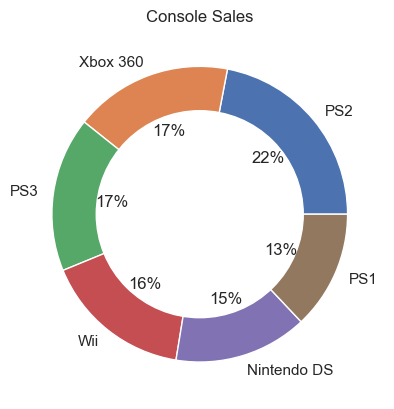

In [174]:
platsales = [1233.46, 969.60, 949.35, 909.81, 818.91, 727.39,]
consoles = ['PS2', 'Xbox 360', 'PS3', 'Wii', 'Nintendo DS', 'PS1']

plt.pie(platsales,labels =consoles,autopct='%.0f%%')

# add circle to centre 
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()

# Adding Circle in donut plot
fig.gca().add_artist(centre_circle)

# Adding Title of donut plot
plt.title('Console Sales')
plt.show()

I will now investigate which are the most popular 'Genre' of games. We will be using the 'Global_Sales' data to complete this investigation. Based off of which Genre sells the most will help with the investigation into the project question; and hopefully shed some more light on consumer video game trends. I will plot the outcome on a barchart below.

In [175]:
genre = df.groupby('Genre')[["Global_Sales"]].sum().sort_values(by=['Global_Sales'], ascending=[False]).reset_index()
genre.head(6)

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87


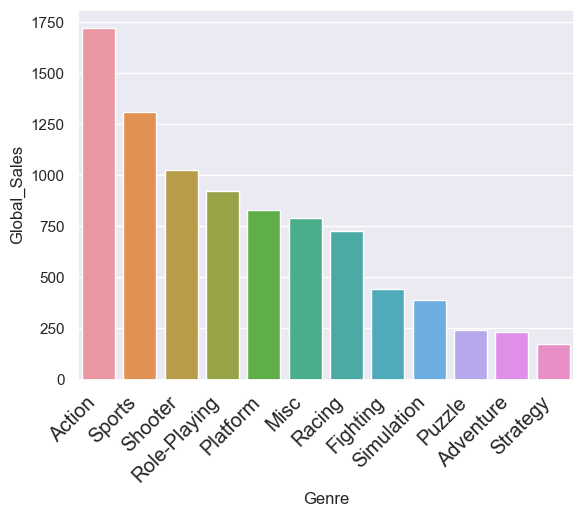

In [176]:
# I will now plot the above dataframe on a barplot for easier comparison.
sns.barplot(data=genre, x="Genre", y="Global_Sales")
sns.set(font_scale=1)
# Corrected font size + added rotation of labels to ensure no overlap.
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light', fontsize='large')
plt.show()

As you can see from the bar chart above; the most popular genre of game sold is 'Action' with 'Sports' games coming int he second position. We note from the data that even though 'Sports' is the secondmost popular genre, there is quite a difference between the most popular Genre and the second most popular. Below, I will now chart a bar chart showing which were the most popular genre's sold and their corresponding years.

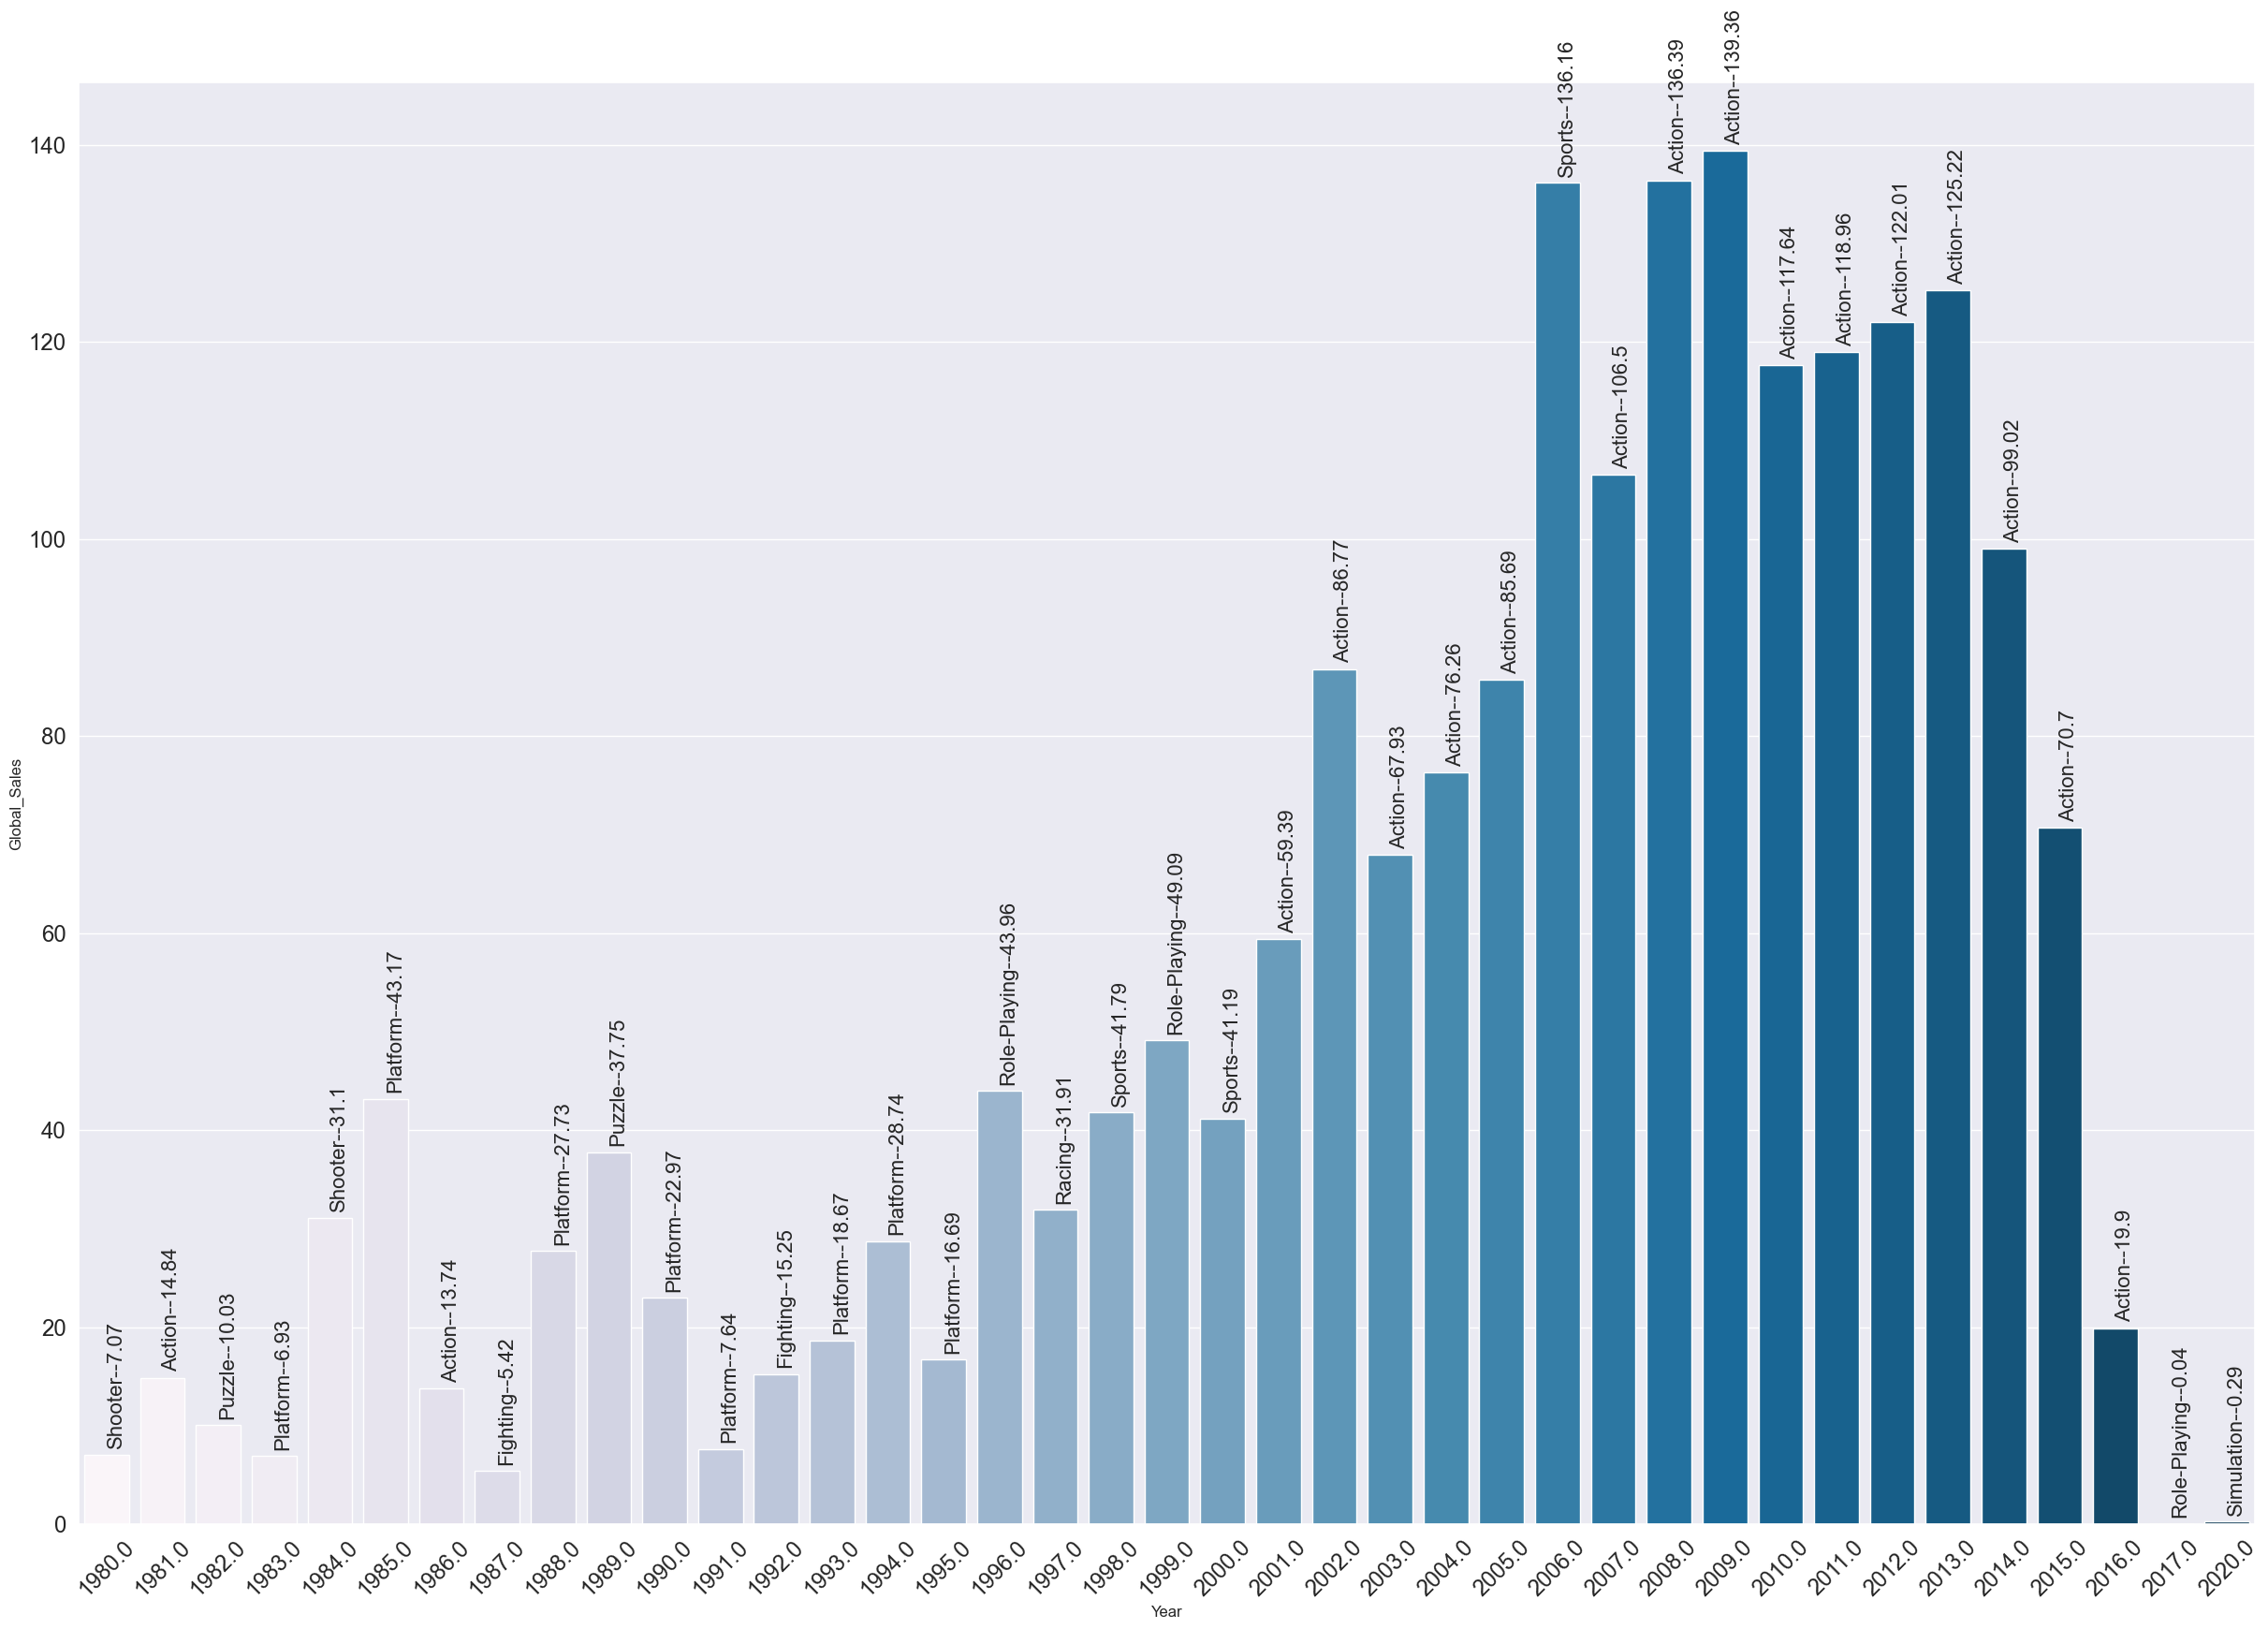

In [177]:
# start by grouping the Genre and Year columns for Global sales and getting the sum of the sales.
year_sale_genre = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
# Transform is used in conjunction with the groupby function and we equal the two columns, year and global sales to the previous dataframe 'year_sales_genre'
year_sale = year_sale_genre.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_genre['Global_Sales']
# I now equate the two dataframes together and reset the index (and 'drop' the old index columns.)
year_sale_max = year_sale_genre[year_sale].reset_index(drop=True)

genre1 = year_sale_max['Genre']

# I now create the bar plot
plt.figure(figsize=(30, 20))
games = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max, palette="PuBu")
index = 0
# below we add code to ensure that the genre that was sold the most per year is displayed.
for value in year_sale_max['Global_Sales']:
# below I set out that the genre is displayed above the individual barplots and also that the values are correct to 2 decimal places, while also displaying the genre title for that year.
    games.text(index, value + 1, str(genre1[index] + '--' +str(round(value, 2))), size=16, rotation= 90)
    index += 1

# ensure that x and y axis fonts are legible 
plt.xticks(rotation=45, fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.show()

Having narrowed down the three 2nd place consoles, I will now cross examine and see which genres were the most popular across the three platforms. This will feed into the overarching question by creating an awareness of console popularity, genre favourite and sales trends.

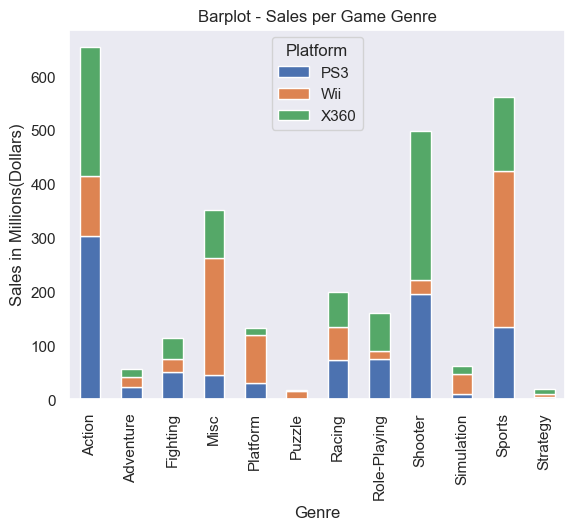

In [178]:
# start by defining the three platforms to plot in the barplot
genre_bar = df[(df['Platform'] == 'Wii') | (df['Platform'] == 'PS3') | (df['Platform'] == 'X360')]

# group the data by genre and platform and put the two figures against global sales.
genreSales = genre_bar.groupby(['Genre','Platform']).Global_Sales.sum()
# 'stack' the plot to make comparison easier.
genreSales.unstack().plot(kind='bar',stacked=True, grid=False)
# label plot
plt.title('Barplot - Sales per Game Genre')
plt.ylabel('Sales in Millions(Dollars)')
plt.show()

As with the bar plots above, all three concur that Action games have the greatest selling power, and that is irrespective of platform. I will now investigate the top 10 selling games globally; as you will see from the data below; 'Wii Sports' is the highest selling game globally (according to the dataset.) Please note that all displayed figures are in million dollars ($).

In [179]:
# I create a dataframe for the top 10 list of best selling games and display them below.
top10 = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top10.head(10)

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Modern Warfare 3,30.83
8,New Super Mario Bros.,30.01
9,Call of Duty: Black Ops II,29.72


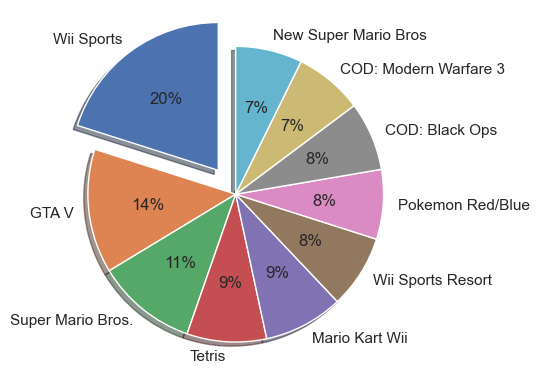

In [180]:
# I create another pie chart, this time showing the percentage of the top 10 highest selling games in comparison with one another.
piedata = [82.74, 55.92, 45.31, 35.84, 35.82, 33.00, 31.37, 31.03, 30.83, 30.01]
labels = ['Wii Sports', 'GTA V', 'Super Mario Bros.', 'Tetris', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Blue', 'COD: Black Ops', 'COD: Modern Warfare 3', 'New Super Mario Bros']
colors = sns.color_palette('pastel')[0:5]
explode = (0.2, 0,0,0,0,0,0,0,0,0)

# the (autopct='%.0f%%') allows me to show the percentage values on the pie chart - I also add 'shadow' to this chart and explode the most popular game name.
plt.pie(piedata, explode=explode, labels = labels, autopct='%.0f%%', shadow = True, startangle=90)

plt.show()

As the piechart above shows - Wii Sports was the highest selling game from the information in the dataset, with GTA V (Grand Theft Auto 5) coming in a close 2nd, which is remarkable as the game still sells well today and it is over 10 years old!. I will now investigate which publishers sold the most games in each region - and see if publishers overlapped across the 4 regions.

In [181]:
publish = pd.DataFrame(df.groupby("Publisher")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
publish.head(6)

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30


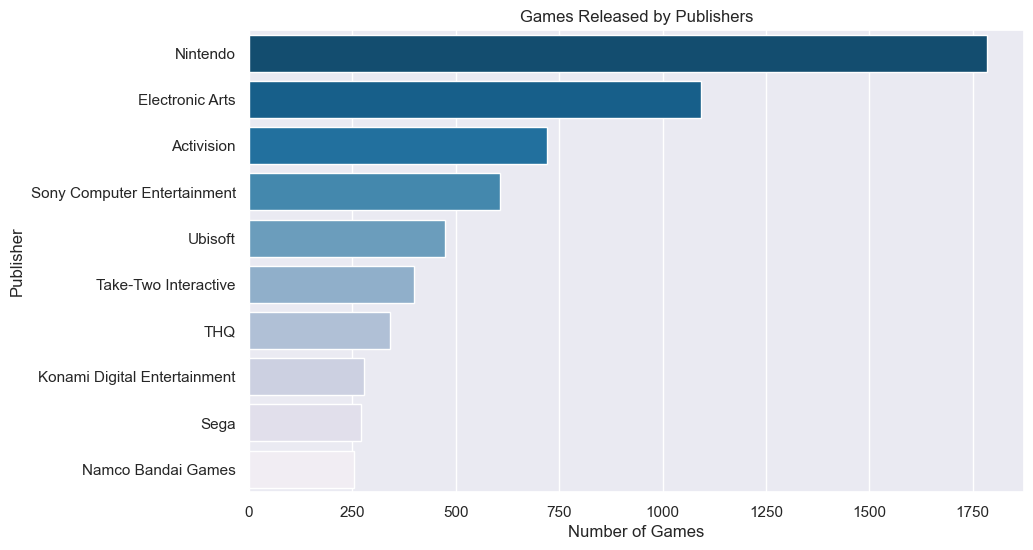

In [182]:
publish= df.groupby(['Publisher']).sum()['Global_Sales'].sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(y = publish.index, x = publish.values, palette = "PuBu_r")
plt.title('Games Released by Publishers')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

Based off the above dataframe the most popular publisher is 'Nintendo' with 'Electronic Arts' (EA) placing in second place. Interesting to note that 'Nintendo' has sold more than double the units that 'Activision' in 3rd place has sold. Finally, I will analyse how many games were sold in each year - this will give an indication into the most popular years for gaming and will help us understand any trends in the projection stage.

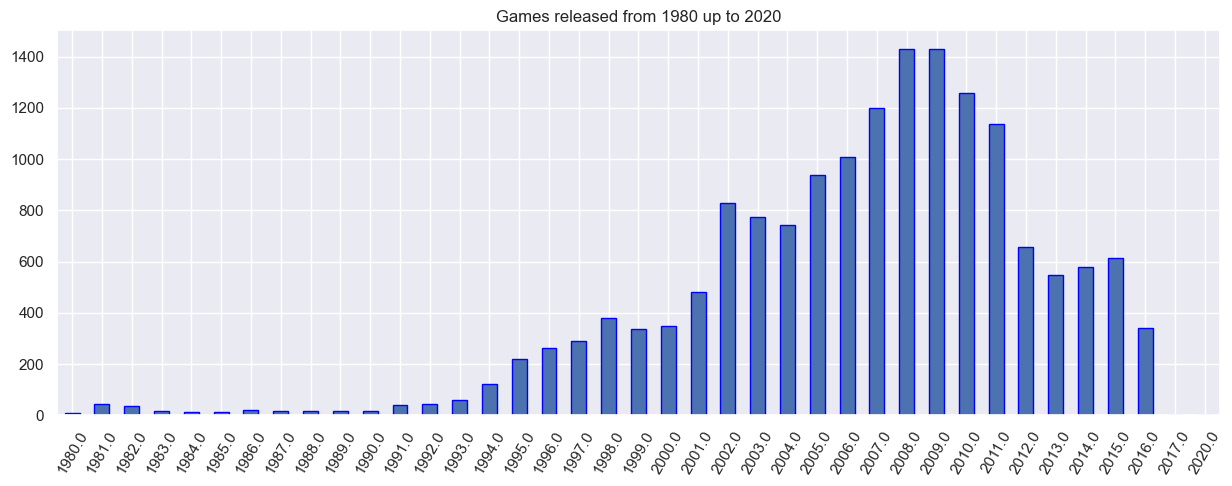

In [183]:
df.groupby('Year')['Global_Sales'].count().plot(kind='bar', y='Number of Games', figsize=(15,5), edgecolor='blue')
plt.title('Games released from 1980 up to 2020')
plt.xticks(rotation=60)
plt.xlabel('')
plt.show()

As you can see from the plot above, games sales began making a steady increase starting from 1991 and continued climbing in a steady fashion until they plateaued in 2008/2009. Games sales then began to slowly decline and the dataset does not contains any accurate data from 2017 onwards.

----

<h3 align="center">Examining Relationships</h3>

----

Following the plotting of the different variables above I have been able to start to examine the potential common thread across the 4 sales regions and the years in which the most games were sold. I will use scatterplots below to analyse the relationship between the 4 regions and the games sales.

In [184]:
#Group the sales into variables; using time as the key comparitor.
na_sales = pd.DataFrame(df.groupby("Year")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
eu_sales = pd.DataFrame(df.groupby("Year")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
jp_sales = pd.DataFrame(df.groupby("Year")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
global_sales = pd.DataFrame(df.groupby("Year")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())

#Concatenating the datasets
time_sales=pd.concat([na_sales, eu_sales, jp_sales, global_sales],axis=1)

time_sales.head(5)

,Year,NA_Sales,Year,EU_Sales,Year,JP_Sales,Year,Global_Sales
0,2008.0,351.44,2009.0,191.59,2006.0,73.73,2008.0,678.90
1,2009.0,338.85,2008.0,184.40,2009.0,61.89,2009.0,667.30
2,2007.0,311.18,2010.0,176.57,2007.0,60.29,2007.0,609.92
3,2010.0,304.24,2011.0,167.31,2008.0,60.26,2010.0,600.29
4,2006.0,263.12,2007.0,160.18,2010.0,59.49,2006.0,521.04


Text(0.5, 0.98, 'Examining Relationship between Year and Sales across North America, EU and Japan regions')

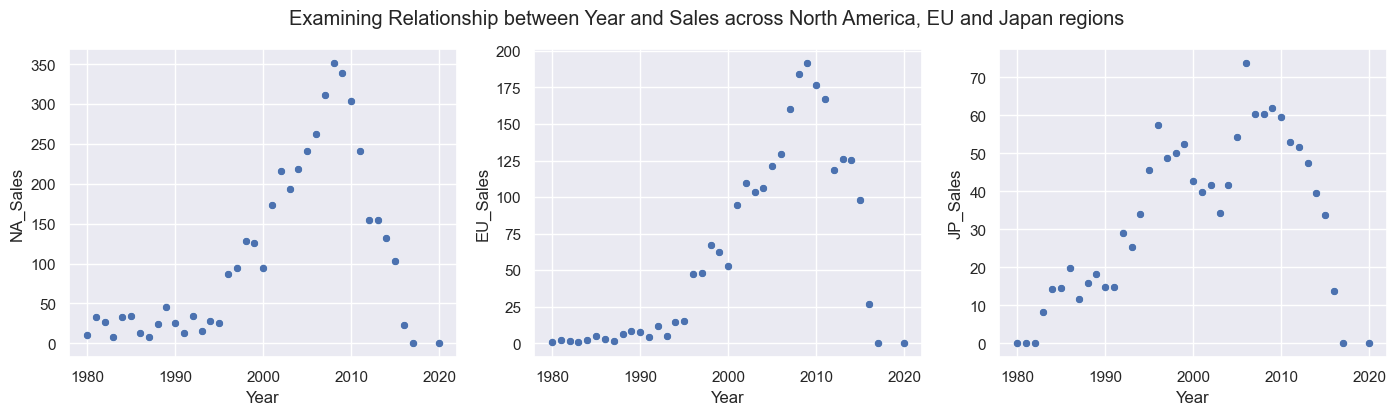

In [185]:
#creating 3 scatterplots sides by side for easy comparison
fig, axes  = plt.subplots(1, 3, figsize=(17, 4))
sns.scatterplot(ax = axes[0], data= na_sales, x="Year", y="NA_Sales")
sns.scatterplot(ax= axes[1],data= eu_sales, x="Year", y="EU_Sales")
sns.scatterplot(ax = axes [2],data= jp_sales, x="Year", y="JP_Sales")
plt.suptitle("Examining Relationship between Year and Sales across North America, EU and Japan regions")

----

We note from the scatterplots above that there are common consumer trends acorss the EU and US markets, culminating in continuous game sales growth from the mid 90's right up until 2009, before sales figures began steadily declining. Interestingly the Japanese market experienced a similar steady growth in games sales, but had a decline in sales around the early 2000's before having a resurgence that mirrored the other two markets.

----

<h3 align="center">Synthesizing Data</h3> 

----

I start by training the program to see how accurate it's predictions are while using the data set. I start by setting out the inputs and expected outputs, and train the machine to pick up on patterns in the video games data. Unfortunately due to bad choice of dataset the parameters within which I am trying to measure are difficult to show clearly - I am attempting below to train the machine to predict future sales based upon a consoles platform, by using the sales data from the data set. 

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
inputs = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
outputs = df['Platform']

In [188]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [189]:
df.loc[1]

Name            Super Mario Bros.
Platform                      NES
Year                       1985.0
Genre                    Platform
Publisher                Nintendo
NA_Sales                    29.08
EU_Sales                     3.58
JP_Sales                     6.81
Other_Sales                  0.77
Global_Sales                40.24
Name: 1, dtype: object

In [190]:
#test and see if code will output an 'NES' platform game using the inputs/output above 
knn.predict([[29.08,3.58,6.81, 0.77, 40.24]])

C:\Users\Sean\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['NES'], dtype=object)

In [191]:
#test to see how accurate the prediction is.
(knn.predict(inputs)==outputs).sum()

8000

In [192]:
# testing machine to see how accurate - we will use 50% of the dataset for the machine to learn, and 50% that it hasnt seen before.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.50, random_state=8)

knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_test, outputs_test)
(knn.predict(inputs_test)==outputs_test).sum()

3980

As we can see from the testing above, the input/oupt machine learning fromt he dataset is quite accurate - averaging on 98% accurate. I will now attempt to plot the video games sales on a linear regression table.

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.50)

In [195]:
# attempt to create a linear regression model
model = LinearRegression()
model.fit(inputs_test, inputs_test)
y_prediction = model.predict(inputs_test) 

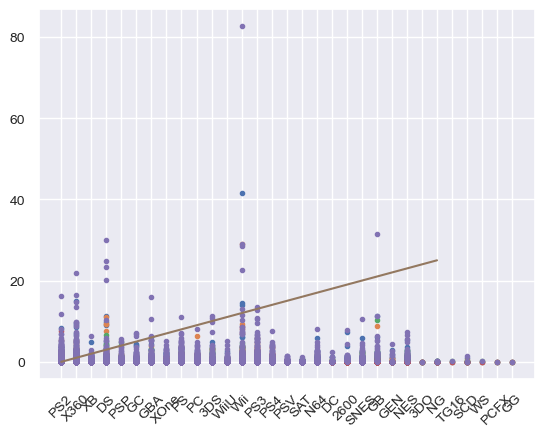

In [196]:
plt.plot(outputs_test, y_prediction, '.')

x = np.linspace(0,25,250).reshape((-1,1))
y = x
plt.xticks(rotation=45, fontsize='small')
plt.yticks(fontsize='small')
plt.plot(x,y)
plt.show()

I will now attempt to synthesize the dataset using the 'Year' data, using a random number generatore - gathering sales data from 2000 right up until the dip in sales in 2009..

In [197]:
idx = pd.date_range(start='2000',end ='2009',freq = "M")
idx

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30',
               '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31',
               '2008-11-30', '2008-12-31'],
              dtype='datetime64[ns]', length=108, freq='M')

In [198]:
rng = np.random.default_rng()
rng.random()

0.8122794517935058

In [199]:
s = pd.DataFrame(data=rng.poisson(10, len(idx)), index=idx, columns = ['Global_Sales_Monthly'])
print(s)

            Global_Sales_Monthly
2000-01-31                     5
2000-02-29                    10
2000-03-31                     8
2000-04-30                     7
2000-05-31                     4
...                          ...
2008-08-31                     7
2008-09-30                     6
2008-10-31                     7
2008-11-30                     4
2008-12-31                    11

[108 rows x 1 columns]


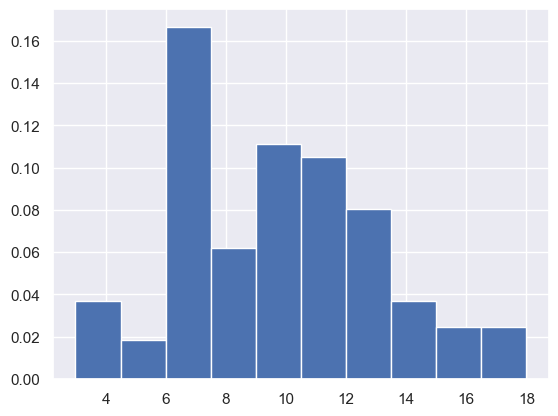

In [200]:
R= rng.poisson(1000,16000)
count, bins, ignored = plt.hist(s, 10, density=True)
plt.show()

In [201]:
s.mean()

Global_Sales_Monthly    9.564815
dtype: float64

Based off of the synthesis above, the machine is trying to predict how popular each console will be and how many games will be produced for said console. The synthesis of the data I found particularly difficult, I am unsure if this is because of my choice of dataset or if Ive done something wrong. It will need further time and analysis.

<h3 align="center">Conclusion</h3>

----

From my analysis of the dataset abovce, we have learnt several things:

1] That although the markets are different - gaming sales transcend the boundaries of cultural differences; North American video game sales and European game sales almost mirror each other - both reaching their peak in 2008/2009 before slowly declining. The start of this decline can also be attirbuted to the global economic crash; which caused many game production houses to either be absorbed by large companies, or go bust all together. This was also around the time that virtual versions of video games (downloaded via the e-stores of their respective platforms) became more readily available.

2] Interestingly, the Japanese market started to follow the trend of its counterparts, but had a dip in sales around the early 2000's. This dip in sales marked a shift in popularity in the western markets attitudes awat from Japanese production companies and gaming tastes.

3] The number 1 selling console of all time (to date) is the Playstation 2.

4] The most popular genre of game sales is 'Action' with 'Sports' and 'Shooters' in 2nd and 3rd place respectively. 

5] Wii Sports, released in 2006 is the best selling game of all time, it was the first itteration of a game on its type, on a console which was groundbreaking  and innovative at the time of release (The Nintendo Wii). 

6] There is the argument to be made that a videogames sales success depends on how it sells in Europe and North American.

----

<h3 align="center">References:</h3>

----

Lectures by Dr. Brian McGinley

https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic

https://www.kaggle.com/code/mohammedouahman/web-scraping-for-data-sientists

https://stackoverflow.com/questions/6299220/access-a-url-and-read-data-with-r

https://www.statology.org/r-read-csv-from-url/ 

https://towardsdatascience.com/dont-download-read-datasets-with-url-in-python-8245a5eaa919 

https://anvilproject.org/guides/content/creating-links

https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

https://www.reddit.com/r/learnpython/comments/jxzy7p/how_do_i_stop_getting_this_error_valueerror_label/

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

https://stackoverflow.com/questions/49991633/valueerror-label-must-be-of-length-x-using-matplotlib

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot

https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

https://www.w3schools.com/python/python_ml_linear_regression.asp 

https://learnr.wordpress.com/2009/03/17/ggplot2-barplots/ 

https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2 

https://matplotlib.org/stable/gallery/style_sheets/ggplot.html

https://datascience.fm/video-game-sales-analysis/

https://www.google.com/search?q=do+I+need+to+install+scikit+learn+on+visual+studios+for+it+to+work+on+jupyter+notebook%3F&sa=X&ved=2ahUKEwi1w8ythcr7AhXMglwKHdK-AUUQ7xYoAHoECBIQAQ&biw=1920&bih=929&dpr=1#kpvalbx=_KRSBY5qeApXMgQa_0aDwAQ_30

https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/

https://www.statology.org/valueerror-unknown-label-type-continuous/

https://www.positioniseverything.net/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat64/#:~:text=The%20cause%20of%20the%20valueerror,any%20mistake%20in%20the%20data.

https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module2/?gclid=EAIaIQobChMIwMyJkJLK-wIVlIjVCh3RQAHFEAAYASAAEgI2bPD_BwE

https://stackoverflow.com/questions/46113732/modulenotfounderror-no-module-named-sklearn

https://www.youtube.com/watch?v=vt4WJozY48A

https://stackoverflow.com/questions/43222882/singleton-array-arrayfunction-train-at-0x7f3a311320d0-dtype-object-cannot-b 

https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam

https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b

https://openmx.ssri.psu.edu/wiki/generating-simulated-data

https://realpython.com/python-random/

https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

https://www.statology.org/valueerror-unknown-label-type-continuous/

https://stackoverflow.com/questions/29620996/preprocess-large-datafile-with-categorical-and-continuous-features

https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float

https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79

https://stackoverflow.com/questions/48643256/typeerror-iteration-over-a-0-d-array-python

https://bobbyhadz.com/blog/python-typeerror-list-indices-must-be-integers-or-slices-not-str 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

https://www.dotcms.com/docs/latest/markdown-syntax